In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Storytelling

## Presentation - Non-Technical

### What are Animal Shelters? 

An animal shelter is a staffed facility where homeless animals—and animals seized by authorities in cruelty cases—find safety and comfort, are cared for, and are made available for adoption. Many of these animals are found in terrible conditions, and these shelters try to provide a refuge; and are a stepping stone for a new home. Below we compiled a DataSet from the Autin Animal Center

- "The Austin Animal Center is the largest no-kill animal shelter in the United States that provides care and shelter to over 18,000 animals each year. As part of the AAC's efforts to help and care for animals in need, the organization makes available its accumulated data and statistics as part of the city of Austin's Open Data Initiative."

Although they do a fantastic job, their will always be unwanted animals out there looking for love. If you are looking to adopt, and are willing, please take these animals into consideration: All they want is a home.

In [2]:
df = pd.read_csv (r'aac_intakes_outcomes.csv')
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [3]:
df.shape

(79672, 41)

In [4]:
df = df[['sex_upon_outcome', 'age_upon_outcome_age_group','animal_type','breed','color','sex_upon_intake','time_in_shelter_days']]
df.head()

,sex_upon_outcome,age_upon_outcome_age_group,animal_type,breed,color,sex_upon_intake,time_in_shelter_days
0,Neutered Male,"(7.5, 10.0]",Dog,Spinone Italiano Mix,Yellow/White,Neutered Male,0.588194
1,Neutered Male,"(5.0, 7.5]",Dog,Spinone Italiano Mix,Yellow/White,Neutered Male,1.259722
2,Neutered Male,"(5.0, 7.5]",Dog,Spinone Italiano Mix,Yellow/White,Neutered Male,1.113889
3,Neutered Male,"(7.5, 10.0]",Dog,Dachshund,Tricolor,Neutered Male,4.970139
4,Neutered Male,"(15.0, 17.5]",Dog,Shetland Sheepdog,Brown/White,Neutered Male,0.119444


### Exploring our Data

Let's first ask ourselves, what kind of animals we find in the shelter? How many of each? 

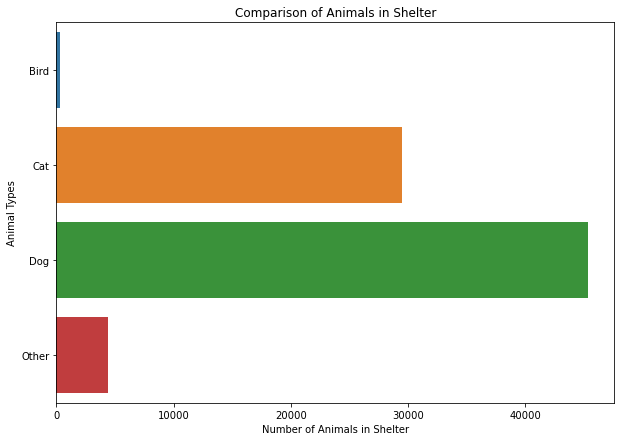

In [5]:
animals = pd.DataFrame(df.groupby(['animal_type'])['animal_type'].count())

_ = plt.subplots(figsize=(10,7))
ax = sns.barplot(data=animals, x='animal_type', y=animals.index)
_ = ax.set(xlabel='Number of Animals in Shelter', ylabel = 'Animal Types', title = "Comparison of Animals in Shelter")

- Dogs and cats make up the majority of animals in the Shelter. With Dogs having about 30% more than cats. 

In [6]:
week_shelter = df.sort_values('time_in_shelter_days', ascending=False)
week_shelter = week_shelter[week_shelter['time_in_shelter_days'] < 7]
week_shelter.shape

(48122, 7)

- Fortunately more than half the animals spend less than a week in the shelter. However on average, how does this comapre beteen different animals? 

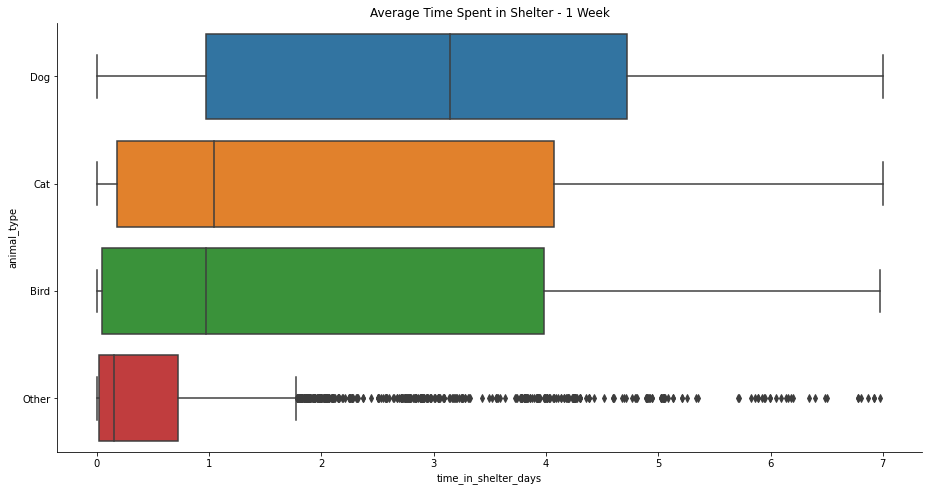

In [7]:
g = sns.catplot(x='time_in_shelter_days', y='animal_type', kind='box', data=week_shelter)
g.fig.set_size_inches(15, 7)
_ = plt.title('Average Time Spent in Shelter - 1 Week')

- In the first week a cat has a better chance of being adopted than a dog. A bird has even a better chance, possibily due to how rare they are? We saw before not many birds reside in the shelter. 

In [8]:
year_shelter = df.sort_values('time_in_shelter_days', ascending=False)
year_shelter.shape

(79672, 7)

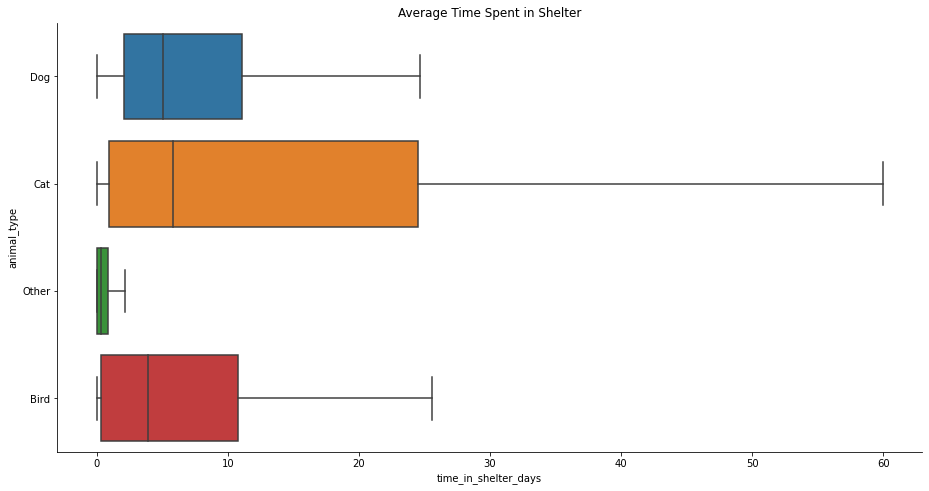

In [9]:
g = sns.catplot(x='time_in_shelter_days', y='animal_type', kind='box', data=year_shelter, showfliers = False)
g.fig.set_size_inches(15, 7)
_ = plt.title('Average Time Spent in Shelter')

- Interistingly enough when we don't filter for animals spending less tham a week in Shelters, we get very different results. The average time cats spend in Shelters is now higher than that of dogs, due to that the third quartile of cats stretches over a larger range of values, as seen in the graph above.

### Unwanted Animals

Now lets explore the unfortunate animals that spend most of their lives in shelters. Hopefully we can se what features they share in common, so that you can be more consciencsous if you decide to adopt an animal. 

In [58]:
long_shelter = df.sort_values('time_in_shelter_days', ascending=False)[0:10000]
long_shelter.head()

,sex_upon_outcome,age_upon_outcome_age_group,animal_type,breed,color,sex_upon_intake,time_in_shelter_days
5500,Spayed Female,"(2.5, 5.0]",Dog,Chihuahua Shorthair Mix,Tan/White,Spayed Female,1606.194444
10356,Neutered Male,"(-0.025, 2.5]",Cat,Domestic Shorthair Mix,Brown Tabby/White,Neutered Male,1478.200000
12123,Neutered Male,"(2.5, 5.0]",Dog,German Shepherd/Black/Tan Hound,Black/Brown,Neutered Male,1411.147917
18263,Spayed Female,"(-0.025, 2.5]",Dog,Pit Bull Mix,White/Tan,Spayed Female,1268.975000
17795,Neutered Male,"(2.5, 5.0]",Dog,Pit Bull Mix,Chocolate/White,Neutered Male,1268.872917


In [59]:
breed = pd.DataFrame(long_shelter.groupby(['breed'])['breed'].count())
breed.index.name = None
breed = breed.sort_values('breed', ascending=False) [0:9]

In [60]:
breed

,breed
Domestic Shorthair Mix,4399
Pit Bull Mix,1227
Labrador Retriever Mix,511
Domestic Medium Hair Mix,445
Chihuahua Shorthair Mix,272
Domestic Longhair Mix,217
Siamese Mix,161
Australian Cattle Dog Mix,123
German Shepherd Mix,111


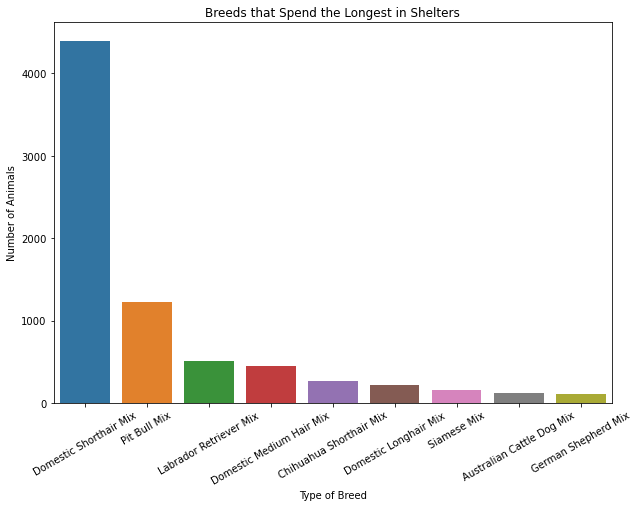

In [61]:
_ = plt.subplots(figsize=(10,7))
ax = sns.barplot(data=breed, x=breed.index, y='breed')
_ = ax.set(xlabel='Type of Breed', ylabel = 'Number of Animals', title = "Breeds that Spend the Longest in Shelters")
ax.tick_params(axis='x', rotation=30)

Unfortunately, the 10 breeds that spend the longest in shelters are all mixed breeds. Therefore if you are looking for a pet, please consider adopting a mixed breed. After years of neglect, all they want is a caring home